In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import mysql.connector
import pandas as pd

# Read the dataset
file_path = "BlinkIT-Grocery-Data.csv"
data = pd.read_csv(file_path)

# Clean column names by removing any NaN values and replacing spaces with underscores
data.columns = data.columns.fillna('Unknown')  # Replace NaNs with 'Unknown' or any default name
data.columns = [col.replace(' ', '_') for col in data.columns]  # Replace spaces with underscores

# Ensure no empty column names exist
data.columns = [col if col else 'Unknown' for col in data.columns]

# Handle NaN values in data (if necessary, you can fill or drop them)
# Example: Fill NaN values with 'Unknown' or drop rows/columns as needed
data = data.fillna('Unknown')  # Fill NaN values with 'Unknown'
# Alternatively, if you want to drop rows with NaN values:
# data = data.dropna()

# Database connection details
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "Uvez@2004",  
    "database": "homework"  
}

# Establishing the database connection
try:
    conn = mysql.connector.connect(**db_config)
    cursor = conn.cursor()
    print("Connected to MySQL database successfully.")

    # Create table query
    create_table_query = """
    CREATE TABLE IF NOT EXISTS BlinkIT_Grocery (
        id INT AUTO_INCREMENT PRIMARY KEY,
        {columns}
    );
    """

    # Dynamically generate table columns based on cleaned CSV headers
    columns = ", ".join(f"`{col}` VARCHAR(255)" for col in data.columns)
    cursor.execute(create_table_query.format(columns=columns))
    print("Table created successfully.")

    # Insert data into the table
    insert_query = f"""
    INSERT INTO BlinkIT_Grocery ({', '.join([f"`{col}`" for col in data.columns])})
    VALUES ({', '.join(['%s'] * len(data.columns))});
    """
    
    for _, row in data.iterrows():
        cursor.execute(insert_query, tuple(row))
    conn.commit()
    print("Data inserted successfully.")

except mysql.connector.Error as err:
    print(f"Error: {err}")
finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print("Connection closed.")


Connected to MySQL database successfully.
Table created successfully.
Data inserted successfully.
Connection closed.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility,Item_Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.8,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.6,55.1614,5.0


In [17]:
data.tail()

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Visibility,Item_Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,Unknown,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,Unknown,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,Unknown,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,Unknown,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,Unknown,112.2544,4.0


In [3]:
# Check the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   object 
 1   Item_Identifier            8523 non-null   object 
 2   Item_Type                  8523 non-null   object 
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Location_Type       8523 non-null   object 
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Visibility            8523 non-null   float64
 9   Item_Weight                8523 non-null   object 
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [4]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Visibility',
       'Item_Weight', 'Sales', 'Rating'],
      dtype='object')

In [5]:
# Shows statistical information about our dataset
data.describe()

,Outlet_Establishment_Year,Item_Visibility,Sales,Rating
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,140.992783,3.965857
std,3.189396,0.051598,62.275067,0.605651
min,2011.000000,0.000000,31.290000,1.000000
25%,2014.000000,0.026989,93.826500,4.000000
50%,2016.000000,0.053931,143.012800,4.000000
75%,2018.000000,0.094585,185.643700,4.200000
max,2022.000000,0.328391,266.888400,5.000000


In [6]:
# Check for missing values
data.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_Type                    0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
Item_Visibility              0
Item_Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [7]:
#  Check for Duplicates
# Check for duplicate rows in the dataset
duplicates = data.duplicated().sum()

# Display if there are duplicates
print(f"Number of duplicate rows: {duplicates}")

# Option to drop duplicate rows
data = data.drop_duplicates()


Number of duplicate rows: 0


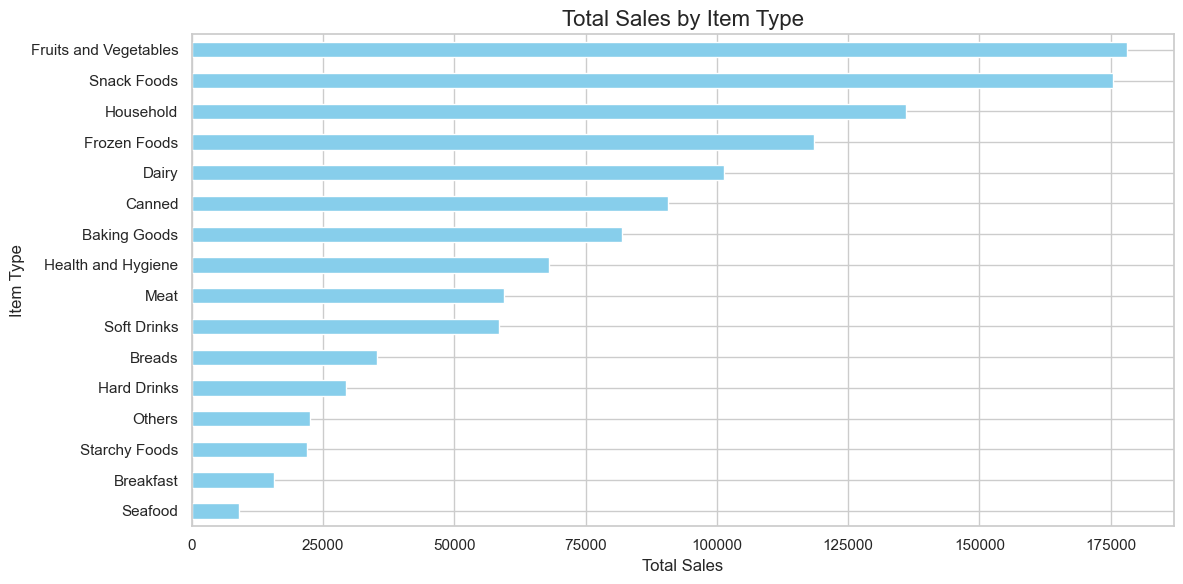

In [13]:
# Total sales by Item Type


# Accessing the column with a corrected name
item_sales = data.groupby("Item_Type")["Sales"].sum().sort_values()
plt.figure(figsize=(12, 6))
item_sales.plot(kind="barh", color="skyblue")
plt.title("Total Sales by Item Type", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Item Type", fontsize=12)
plt.tight_layout()
plt.show()


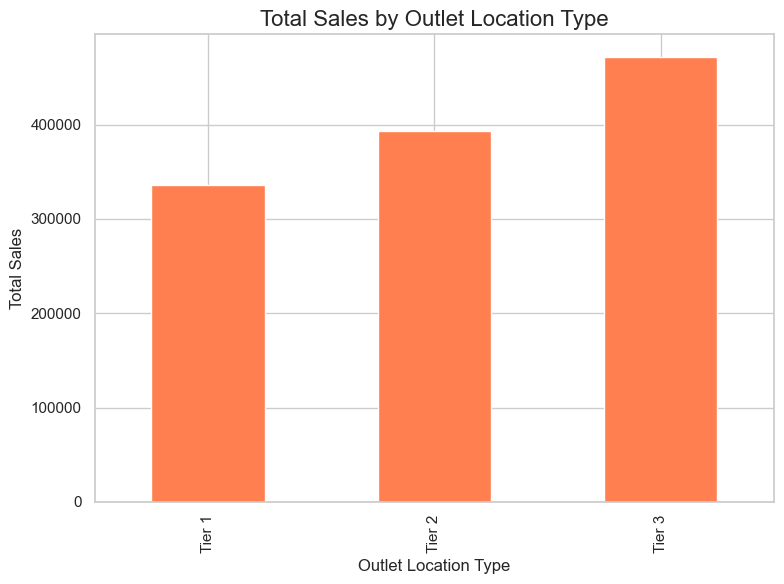

In [14]:
#  Total sales by Outlet Location Type
location_sales = data.groupby("Outlet_Location_Type")["Sales"].sum()
plt.figure(figsize=(8, 6))
location_sales.plot(kind="bar", color="coral")
plt.title("Total Sales by Outlet Location Type", fontsize=16)
plt.xlabel("Outlet Location Type", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.tight_layout()
plt.show()

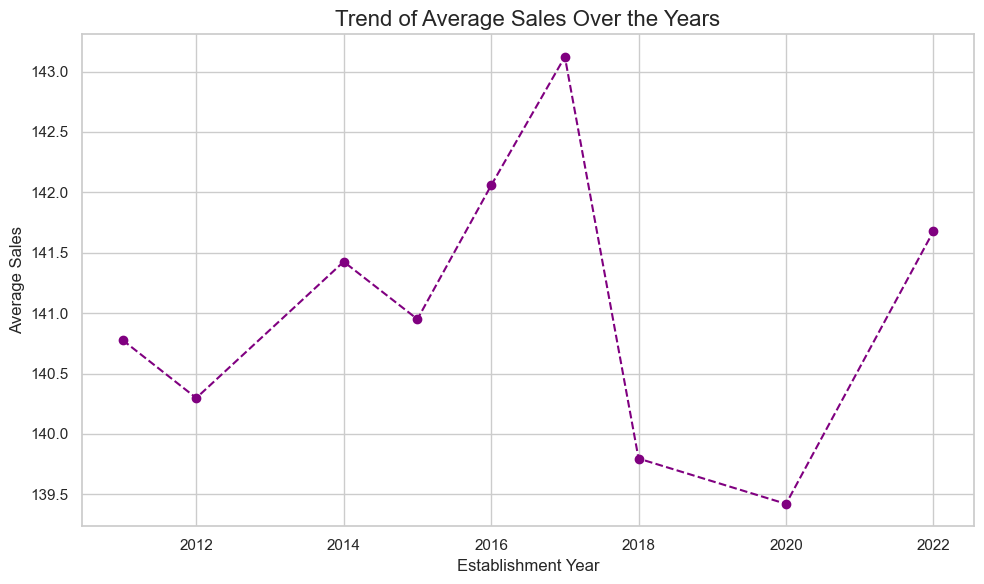

In [15]:
# Trend of average sales over the years
avg_sales_by_year = data.groupby("Outlet_Establishment_Year")["Sales"].mean()
plt.figure(figsize=(10, 6))
avg_sales_by_year.plot(marker="o", linestyle="--", color="purple")
plt.title("Trend of Average Sales Over the Years", fontsize=16)
plt.xlabel("Establishment Year", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.tight_layout()
plt.show()